In [1]:
# load the 10k model
import torch
from torchvision.models import VisionTransformer
import torch.nn as nn
import pickle
import os
import numpy as np
import pandas as pd

In [40]:
class BinaryViT(nn.Module):
    def __init__(self):
        super(BinaryViT, self).__init__()
        self.vit = VisionTransformer(
                    image_size=224,    # Input image size
                    patch_size=16,     # Patch size
                    hidden_dim=768,          # Embedding dimension
                    num_layers=12,         # Number of transformer layers
                    num_heads=12,         # Number of attention heads
                    mlp_dim=3072,     # Feedforward MLP dimension
                    dropout=0.1,      # Dropout probability
                    num_classes=1  # Output classes
                )
    def forward(self, x):
        x = self.vit(x)
        x = nn.Sigmoid()(x)
        return x

In [41]:
weights = torch.load("models/trained_with_10k.pth", map_location="cpu")
model = BinaryViT()
model.load_state_dict(weights)
model.eval()

BinaryViT(
  (vit): VisionTransformer(
    (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (encoder): Encoder(
      (dropout): Dropout(p=0.1, inplace=False)
      (layers): Sequential(
        (encoder_layer_0): EncoderBlock(
          (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (self_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (dropout): Dropout(p=0.1, inplace=False)
          (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (0): Linear(in_features=768, out_features=3072, bias=True)
            (1): GELU(approximate='none')
            (2): Dropout(p=0.1, inplace=False)
            (3): Linear(in_features=3072, out_features=768, bias=True)
            (4): Dropout(p=0.1, inplace=False)
          )
        )
        (encoder_layer_1): EncoderBlock(
          (ln_1): LayerNo

In [42]:
from PIL import Image
import torchvision.transforms as transforms
# load validation/0/xp.jpeg image
def predict(model: BinaryViT, image: Image.Image) -> bool:
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to the input size of the model
        transforms.ToTensor(),          # Convert to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
    ])
    image = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        output = model(image)
    return output.item()


0.6050532460212708


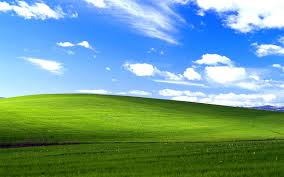

In [43]:
img = Image.open("validation/0/xp.jpeg")
print(predict(model, img))
img

0.003335793735459447


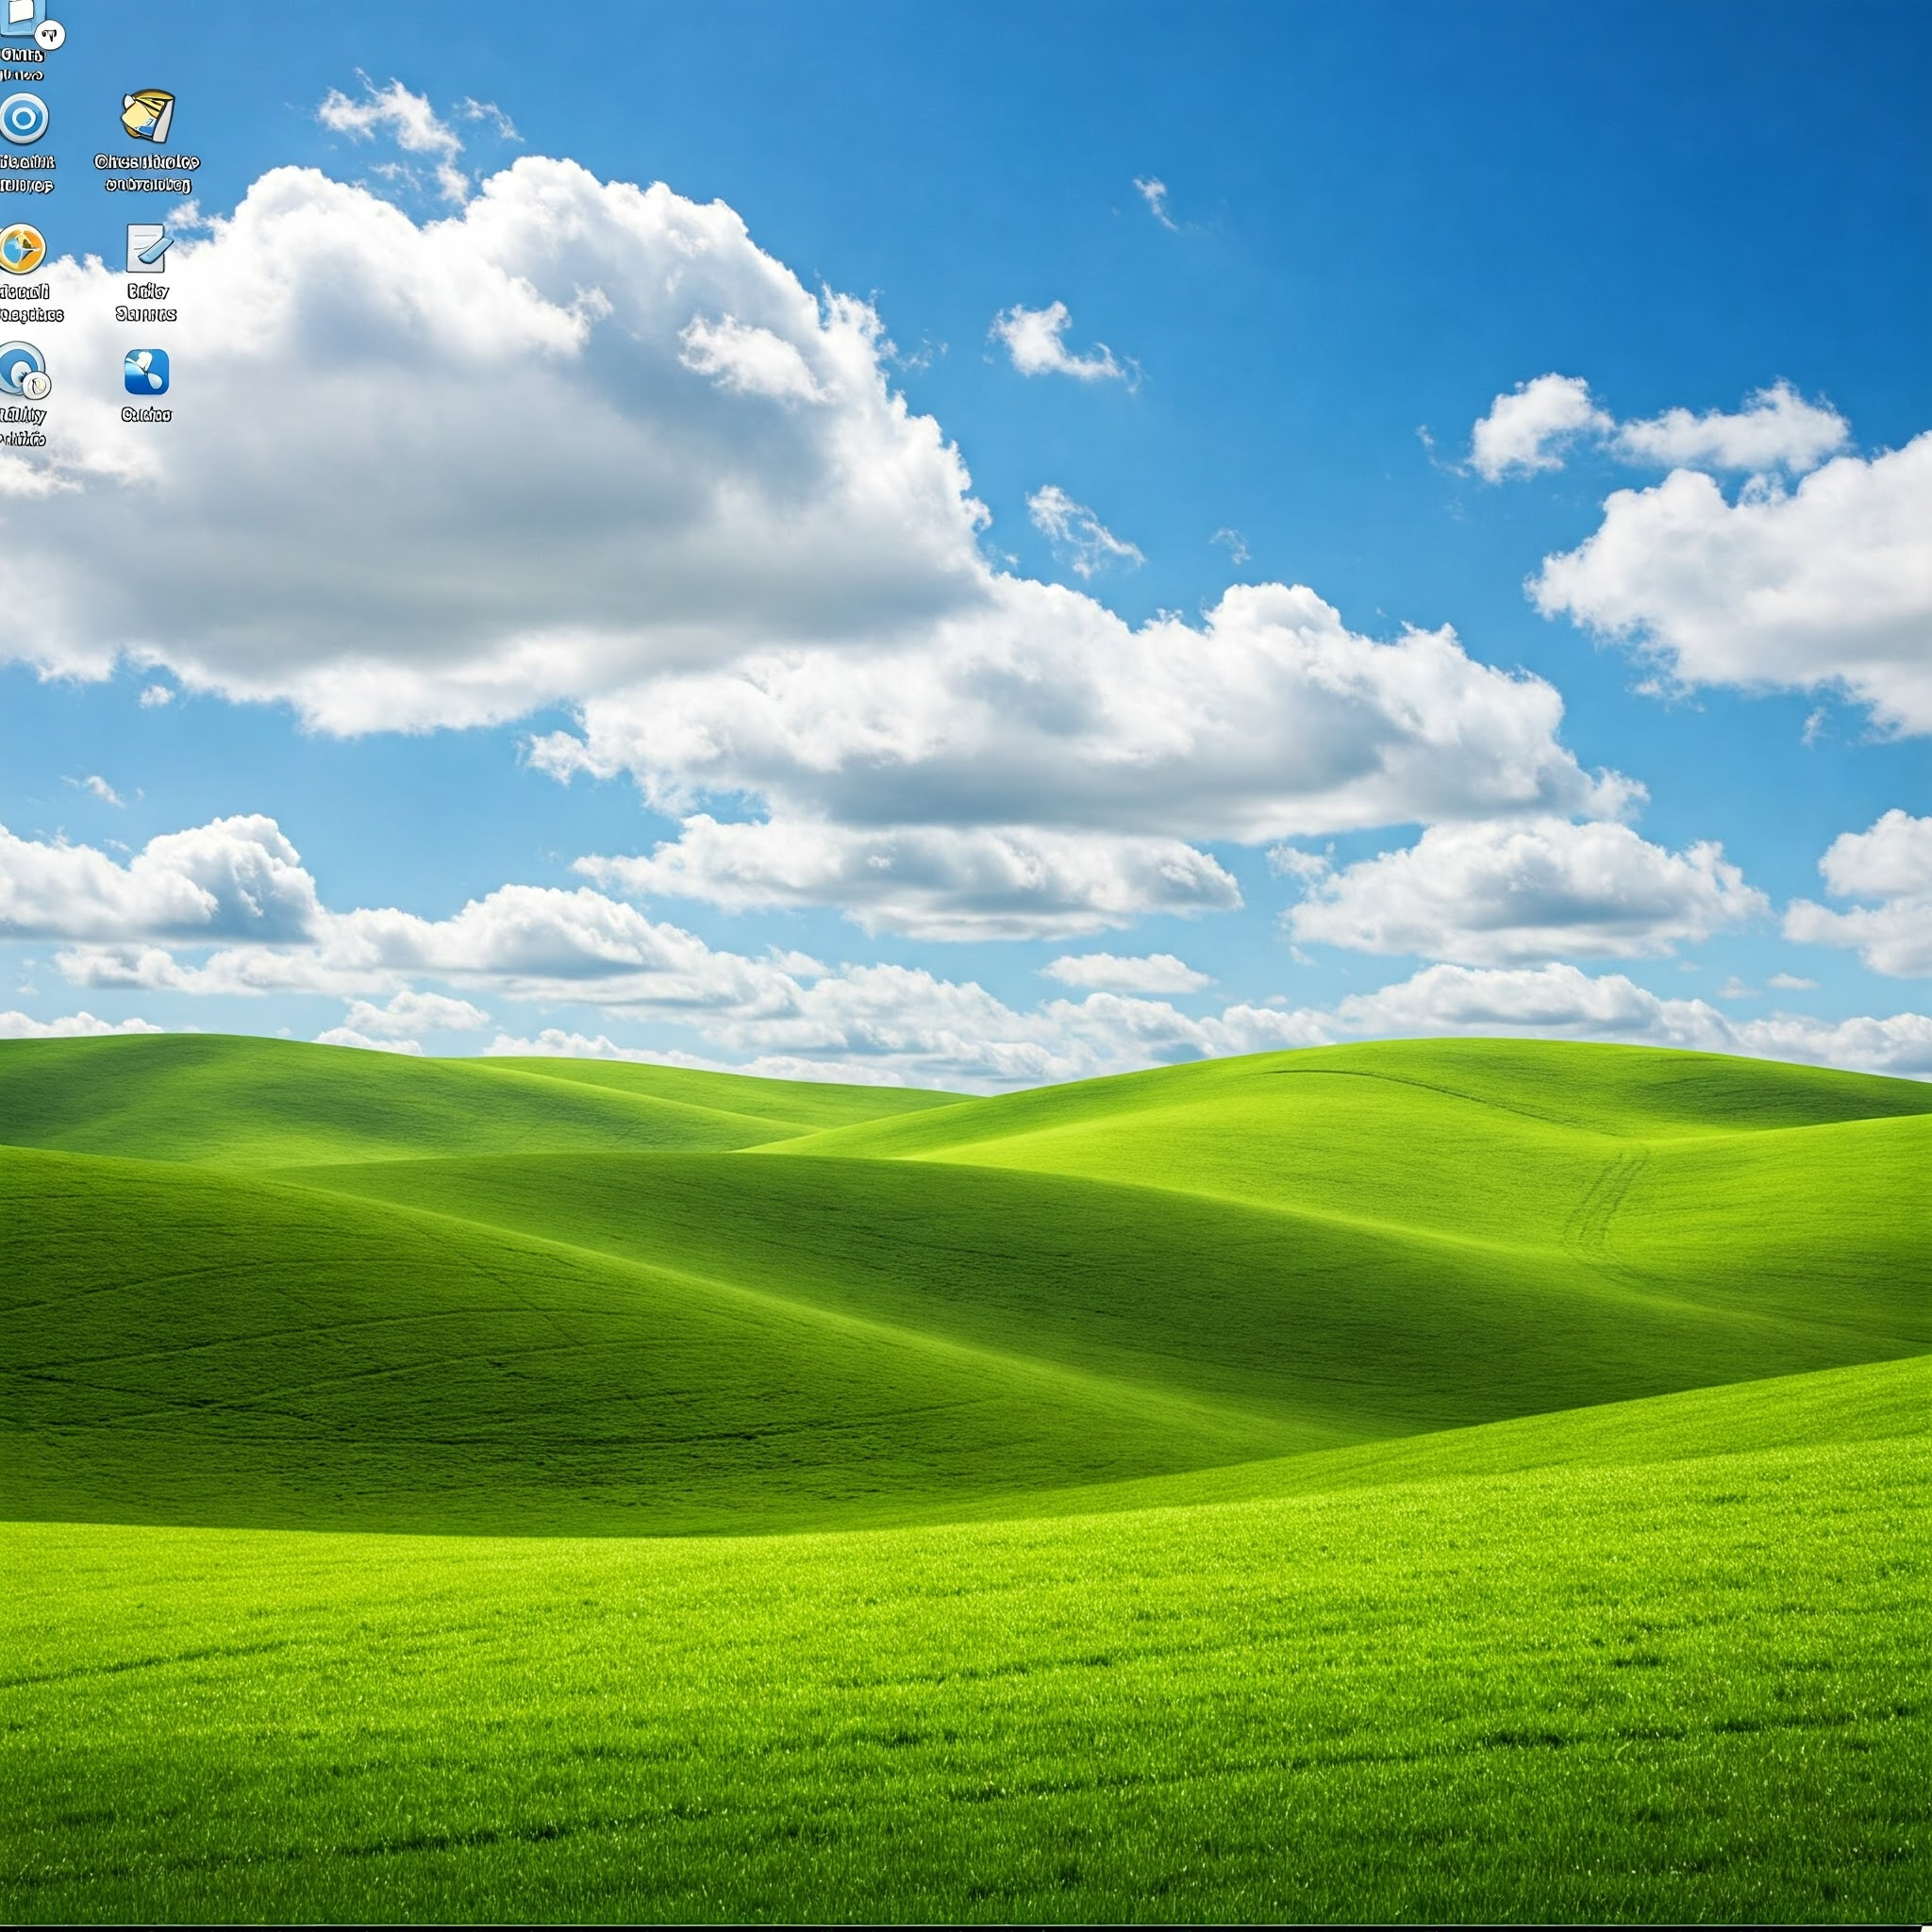

In [44]:
img = Image.open("validation/1/Gemini_Generated_Image_hks1rwhks1rwhks1.jpeg")
print(predict(model, img))
img